In [1]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\Rithvej\Downloads\archive (46)\WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [14]:
# Display the first few rows of the dataset
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [15]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [16]:
# Get basic statistics of the dataset
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

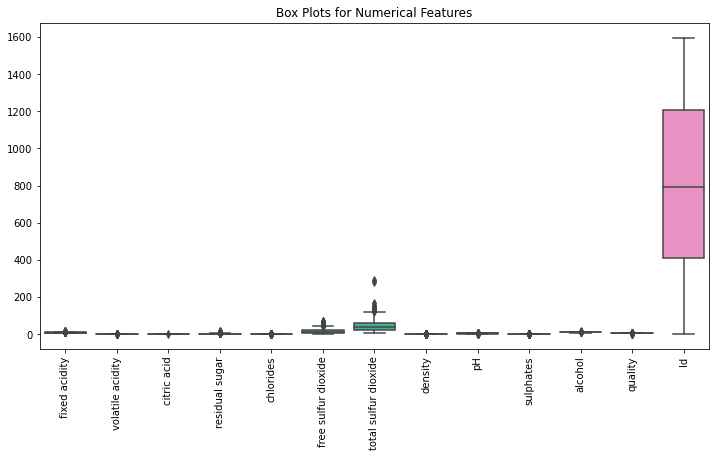

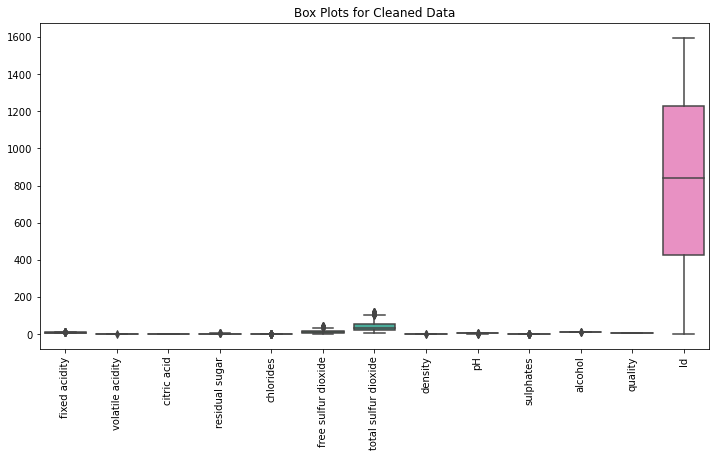

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Step 1: Visual Inspection (Box Plots)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Box Plots for Numerical Features")
plt.show()

# Step 2: Identify Non-Numeric Columns
non_numeric_columns = data.select_dtypes(exclude=np.number).columns

# Step 3: Handle Non-Numeric Columns
# Depending on the non-numeric columns, you may need to convert or preprocess them as needed.
# For simplicity, we'll drop them in this example.

data_numeric = data.drop(columns=non_numeric_columns)

# Step 4: Z-Score Method
z_scores = np.abs(stats.zscore(data_numeric))
threshold = 3

# Find data points with Z-Scores above the threshold
outliers = np.where(z_scores > threshold)
outlier_indices = list(zip(*outliers))

# Step 5: IQR Method
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1
multiplier = 1.5

# Find data points with values outside the IQR boundaries
iqr_outliers = ((data_numeric < (Q1 - multiplier * IQR)) | (data_numeric > (Q3 + multiplier * IQR))).any(axis=1)

# Step 6: Machine Learning-Based (Isolation Forest)
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed

# Fit the model to your data and predict outliers
ml_outliers = model.fit_predict(data_numeric)

# Combine the outlier flags from different methods
combined_outliers = (iqr_outliers | (ml_outliers == -1))

# Step 7: Handle Outliers
# Depending on your analysis, you can choose to remove, transform, or replace outliers as needed.

# Example: Remove outliers
cleaned_data = data[~combined_outliers]

# Now, you can continue with your analysis using the cleaned_data DataFrame.

# Additional visualization of cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data)
plt.xticks(rotation=90)
plt.title("Box Plots for Cleaned Data")
plt.show()


In [20]:
print(data.tail())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0      

In [5]:
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
X = data[features]

In [6]:
y = data["quality"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 0.48
Mean Squared Error: 0.38
Root Mean Squared Error: 0.62
R-squared: 0.32


In [10]:
new_wine_features = np.array([[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.99780, 3.51, 0.56, 9.4]])
predicted_quality = model.predict(new_wine_features)
print(f"Predicted Quality: {predicted_quality[0]:.2f}")


Predicted Quality: 5.06


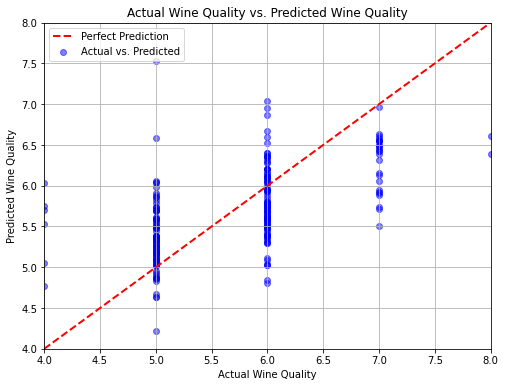

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already trained your linear regression model and made predictions
# y_test: Actual wine quality values
# y_pred: Predicted wine quality values

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Actual vs. Predicted')
plt.title("Actual Wine Quality vs. Predicted Wine Quality")
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.grid(True)

# Add a diagonal line to represent perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# Customize the plot (optional)
plt.legend()
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))

# Show the plot
plt.show()
